In [3]:
import requests 
import networkx as nx 
import matplotlib.pyplot as plt 
import json


api_url = "https://api.yelp.com/v3/businesses/search?term=restaurants&location=Baltimore, Maryland"


api_key = "ZcfYr4XdQ33V_exQ9ITM5AmqiWdkRVF_w_4upCtaFQblvgVZnjvNf8djhU5nnE2IuaJR0iVbfLt4-1lDZwkya7Z5kZCdFHtCu_PAKDqbPI4gsi1EUHigy-ZtS1MXZXYx"

endpoint = "https://api.yelp.com/v3/businesses/search"

HEADERS = {'Authorization': 'bearer %s' % api_key}

parameters = {
                'term': 'asian',
                'location': 'Baltimore',
                

             }

response = requests.get(url = endpoint,
                        params = parameters,
                        headers = HEADERS)

business_data = response.json()

f = open('/Users/trintkillip/Downloads/inst414/yelp.txt', 'w')
f.write(json.dumps(business_data, indent = 3))
f.close()




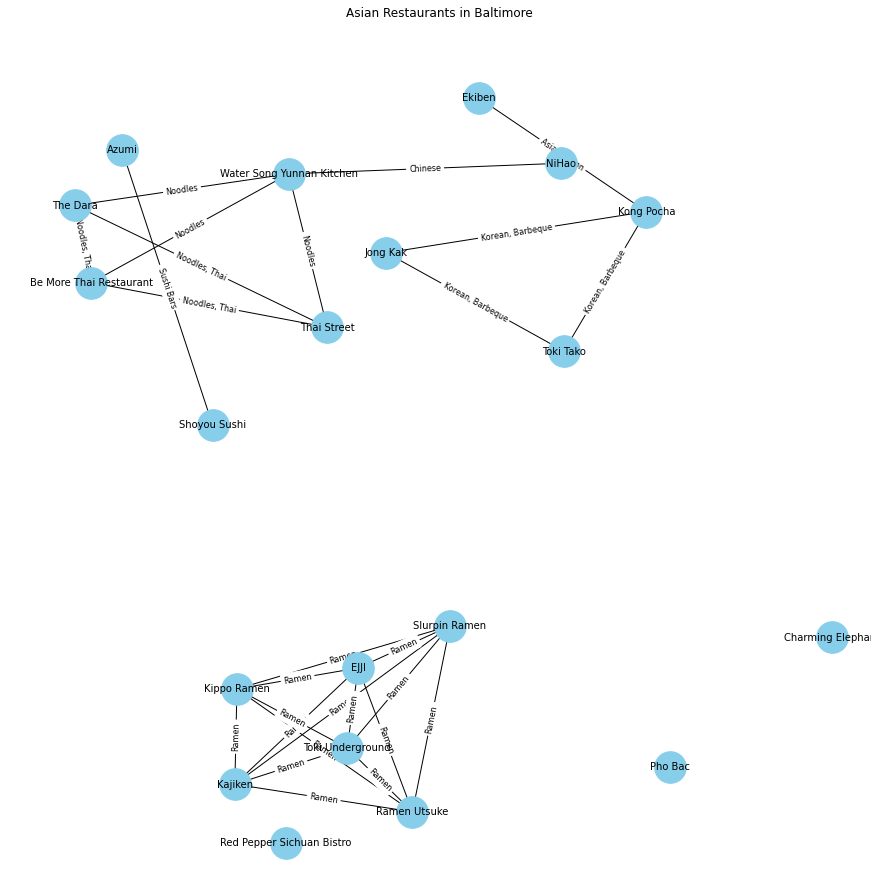

In [4]:
with open('yelp.txt', 'r') as file: 
    data = json.load(file)
    

restaurants = data.get('businesses', [])

G = nx.Graph()

for restaurant in restaurants:
    restaurant_id = restaurant['id']
    restaurant_name = restaurant['name']
    categories = [category['title'] for category in restaurant['categories']]
    G.add_node(restaurant_id, label=restaurant_name, categories = categories)
    
for restaurant1 in restaurants:
    for restaurant2 in restaurants:
        if restaurant1 != restaurant2:
            common_categories = set(
                category1['title'] for category1 in restaurant1['categories']
                for category2 in restaurant2['categories']
                if category1['title'] == category2['title']
            )
            if common_categories:
                G.add_edge(restaurant1['id'], restaurant2['id'], categories=list(common_categories))

# Optionally, visualize the graph with restaurant names as labels
pos = nx.spring_layout(G, seed=42, k=0.5, iterations=20)

# Draw the graph with improved layout and visible labels
plt.figure(figsize=(12, 12))
nx.draw(G, pos, labels=nx.get_node_attributes(G, 'label'), node_size=1000, node_color='skyblue', font_size=10, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): ', '.join(data['categories']) for u, v, data in G.edges(data=True)}, font_size=8)
plt.title('Asian Restaurants in Baltimore')
plt.show()















